In [1]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Kaggle\Predict Future Sales')

In [3]:
# Load Data
sales_train = pd.read_csv('sales_train.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')

In [4]:
# Convert to date time 
sales_train['date'] = pd.to_datetime(sales_train['date'])
sales_train['month'] = pd.DatetimeIndex(sales_train['date']).strftime("%Y-%m-01")

In [24]:
sales_train = sales_train.loc[sales_train['month'] < '2015-11-01']

In [25]:
sales_train.date.unique()

array(['2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', ...,
       '2015-10-28T00:00:00.000000000', '2015-10-25T00:00:00.000000000',
       '2015-10-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [26]:
# DivideAndConquer():
shop_sales = sales_train.groupby(['shop_id','month']).sum().reset_index()[['shop_id','month','item_cnt_day']]
item_sales = sales_train.groupby(['item_id','month']).sum().reset_index()[['item_id','month','item_cnt_day']]

In [27]:
shop_sales

,shop_id,month,item_cnt_day
0,0,2013-01-01,3626.0
1,0,2013-02-01,3957.0
2,0,2013-03-01,403.0
3,0,2013-04-01,473.0
4,0,2013-05-01,465.0
...,...,...,...
1740,59,2015-06-01,905.0
1741,59,2015-07-01,976.0
1742,59,2015-08-01,1199.0
1743,59,2015-09-01,758.0


In [7]:
#shop_sales.sort_values(['shop_id','month']).loc[shop_sales['shop_id']==59]

In [28]:
# Arima Models

from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import pandas as pd
# load dataset
series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

NameError: name 'parser' is not defined

In [32]:
shop59 = shop_sales.sort_values(['shop_id','month']).loc[shop_sales['shop_id']==59][['month','item_cnt_day']]

In [33]:
shop59

,month,item_cnt_day
1711,2013-01-01,1704.0
1712,2013-02-01,2063.0
1713,2013-03-01,1944.0
1714,2013-04-01,1466.0
1715,2013-05-01,1545.0
1716,2013-06-01,1708.0
1717,2013-07-01,1976.0
1718,2013-08-01,2089.0
1719,2013-09-01,1981.0
1720,2013-10-01,1763.0


In [34]:
# shop_sales
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
shop59.index = shop59['month']
shop59.index = pd.to_datetime(shop59.index)
month_index = shop59.index.to_period('M')
shop59 = shop59['item_cnt_day']

C:\Users\formy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\formy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\formy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\formy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\formy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: 

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                   34
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -235.132
Date:                Sat, 21 May 2022   AIC                            492.264
Time:                        21:44:11   BIC                            508.726
Sample:                    01-01-2013   HQIC                           497.803
                         - 10-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7884      0.771     -1.022      0.307      -2.300       0.723
ar.L2          0.0732      1.278      0.057      0.954      -2.431       2.578
ar.L3         -0.7558      0.685     -1.104      0.2

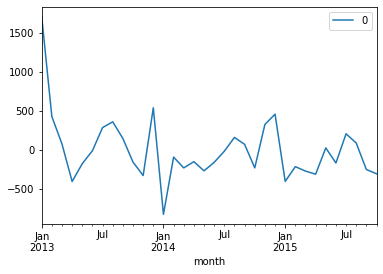

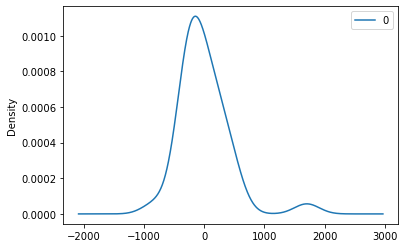

                 0
count    34.000000
mean     -5.218472
std     420.152938
min    -827.094999
25%    -248.041730
50%    -123.838381
75%     153.892468
max    1704.000000


In [35]:
# fit model
from pandas import DataFrame
model = ARIMA(shop59, order=(5,1,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())


In [39]:
model_fit.forecast()

2015-11-01    855.108145
Freq: MS, dtype: float64

In [37]:
shop_sales



,shop_id,month,item_cnt_day
0,0,2013-01-01,3626.0
1,0,2013-02-01,3957.0
2,0,2013-03-01,403.0
3,0,2013-04-01,473.0
4,0,2013-05-01,465.0
...,...,...,...
1740,59,2015-06-01,905.0
1741,59,2015-07-01,976.0
1742,59,2015-08-01,1199.0
1743,59,2015-09-01,758.0
